In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external import tifffile
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

In [2]:
rootff = ''
image = tifffile.imread( rootff+'/Montage.tif')

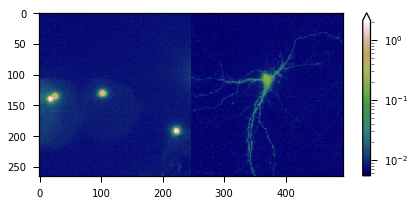

In [13]:
axcc = "black"
params = {"ytick.color" : axcc,
          "xtick.color" : axcc,
          "axes.labelcolor" : axcc,
          "axes.edgecolor" : axcc}


fig = plt.figure(figsize=(7,3))
plt.imshow(image/A0, norm=colors.LogNorm(vmin=image.min()/A0, vmax=image.max()/A0), cmap='gist_earth')

plt.colorbar(extend='max')


plt.rcParams.update(params)

plt.show()
fig.savefig(rootff+'neurons_gist.pdf', transparent=True, dpi=1200)

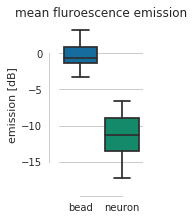

In [3]:
# plot in decibels

sns.set(style="whitegrid", palette="colorblind")

# measures has been done manually in imagej/fiji
df = pd.read_csv(rootff+'measurements_beads_neurons.csv', delimiter='\t')
# determine reference mean for dB scale
df['imean'] = df['imean']-df['background']
A0 = df[ df.neuron_bead =='bead']['imean'].mean()
df['mean [dB]'] = 10*np.log10(df['imean']/A0)

fig = plt.figure(figsize=(1.5,3))
ax = sns.boxplot(y='mean [dB]', x='neuron_bead', data=df, showfliers=False)
ax.set_xlabel('')
ax.set_ylabel('emission [dB]')
ax.set_title('mean fluroescence emission')
sns.despine(offset=10, trim=True)
plt.show()
fig.savefig(rootff+'neurons_diff.pdf', transparent=True, dpi=1200)

In [36]:
neunm = df[ df.neuron_bead =='neuron']['imean'].mean()
neuns = df[ df.neuron_bead =='neuron']['imean'].std()
beadm = df[ df.neuron_bead =='bead']['imean'].mean()
beads = df[ df.neuron_bead =='bead']['imean'].std()

rat = beadm/neunm
raterr = rat*((neuns/neunm) + (beads/beadm))
print('{} ± {}'.format(neunm, neuns))
print('{} ± {}'.format(beadm, beads))
print('{} ± {}'.format(rat, raterr))

1741.9820588235293 ± 1103.4926213295148
18533.553515624997 ± 8060.847859680555
10.639348104504519 ± 11.367103288153562


In [8]:
df

,set,area,mean,min,max,integrated intensity,background,neuron/bead
0,1,1264,3268.890,909,4579,4131877,101.838,bead
1,1,1264,27370.583,6078,45589,34596417,101.838,bead
2,1,1264,27347.794,6668,43043,34567612,101.838,bead
3,1,1264,21204.600,5730,36222,26802615,101.838,bead
4,1,1264,17502.410,3848,24814,22123046,101.838,bead
5,1,1264,30498.964,6554,56773,38550691,101.838,bead
6,1,1264,13105.330,2742,25759,16565137,101.838,bead
7,1,1264,13471.898,3407,22142,17028479,101.838,bead
8,1,1264,24834.449,4177,41019,31390744,101.838,bead
9,1,1264,20708.903,5101,32117,26176053,101.838,bead
